# Face Detection And Recognition Project

In [ ]:
!pip install opencv-python-headless dlib face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=82afbcce2b2d0a303fe4fffe82a0b40f274e383f580079a291cdb0cd2554327a
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
from google.colab import files
uploaded = files.upload()


### Face Detection In Images

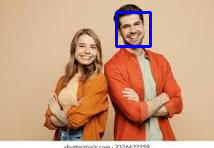

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Import the colab version of cv2_imshow

# Load the Haar cascade file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect faces in an image
def detect_faces(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    # Draw rectangles around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display the image using cv2_imshow instead of cv2.imshow
    cv2_imshow(image)

# Test the function
detect_faces('/content/download.jfif')


### Face Detection In Video

In [ ]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Path to your video file
video_path = '/path/to/your/video.mp4'

# Initialize video capture from file
video_capture = cv2.VideoCapture(video_path)

# Check if the video capture is successful
if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    while video_capture.isOpened():
        # Capture frame-by-frame
        ret, frame = video_capture.read()

        if not ret:
            print("Error: Failed to capture frame.")
            break

        # Convert the frame to RGB (face_recognition uses RGB)
        rgb_frame = frame[:, :, ::-1]

        # Find all the faces and face encodings in the current frame
        face_locations = face_recognition.face_locations(rgb_frame)

        # Loop through each face found in the current frame
        for (top, right, bottom, left) in face_locations:
            # Draw a box around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Display the resulting frame
        cv2_imshow(frame)

        # Break the loop if the video ends or 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture and close windows
    video_capture.release()
    cv2.destroyAllWindows()
